# UE20CS312 - Data Analytics - Worksheet 3b - AR and MA models

PES University

Reshmi Pradeep, Dept. of CSE - PES2UG20CS270

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime 
import sklearn.linear_model

In [2]:
df = pd.read_csv('doge.csv')
df.head()

,Date,Price
0,2021-08-15,0.348722
1,2021-08-16,0.349838
2,2021-08-17,0.345208
3,2021-08-18,0.331844
4,2021-08-19,0.321622


# Problem 0

In [3]:
df1 = pd.DataFrame(df,columns=['Date','Price'])
df1["Date"] = df1["Date"].astype("datetime64")
df.set_index("Date",inplace = True)
df.head()

,Price
Date,
2021-08-15,0.348722
2021-08-16,0.349838
2021-08-17,0.345208
2021-08-18,0.331844
2021-08-19,0.321622


# Problem 1

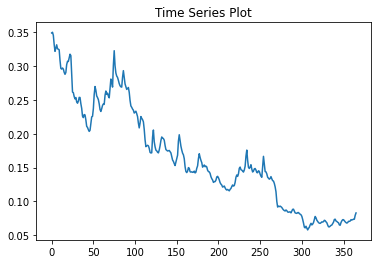

In [4]:
plt.plot(df1["Price"])
plt.title("Time Series Plot")
plt.show()

The time series plot is not stationary

### ACF plot of the time series

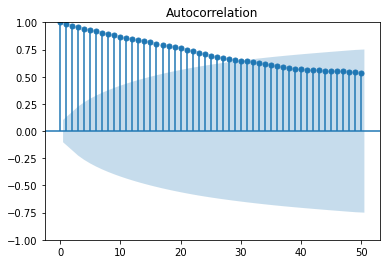

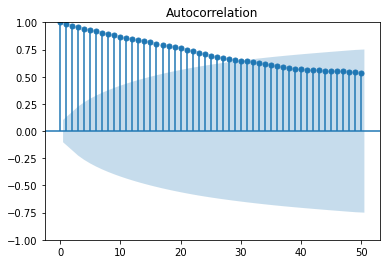

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Price, lags = 50)

The lines that are correlated are positively correlated

# Problem 2

In [6]:
def print_adf_results(adf_result):
    print('ADF Statistic: %f' % adf_result[0])
    print('p-vale: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
           print('\t%s: %.3f' % (key, value))

In [7]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df)
print_adf_results(adf_result)

ADF Statistic: -1.558935
p-vale: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Since the p-value is around 0.5, it's non-stationary

In [8]:
diff = df.diff().dropna()
adf_res = adfuller(diff)
print_adf_results(adf_res)

ADF Statistic: -5.593446
p-vale: 0.000001
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Low p-value is found

<AxesSubplot: xlabel='Date'>

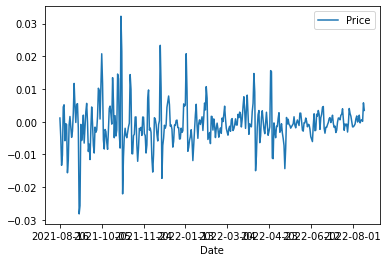

In [9]:
diff.plot()

# Problem 3


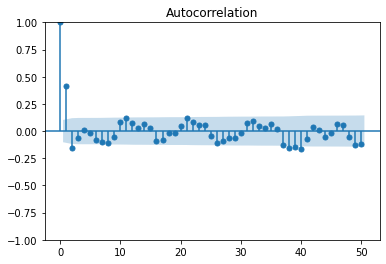

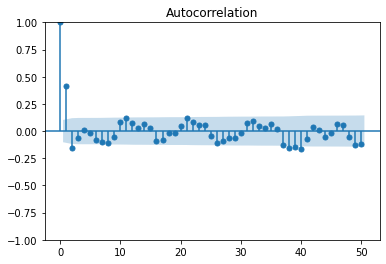

In [10]:
plot_acf(diff, lags = 50)

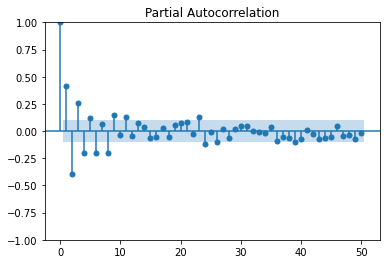

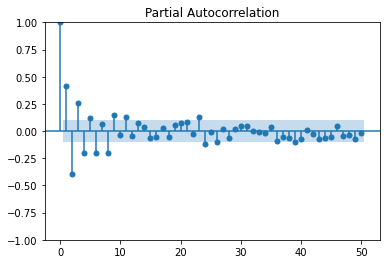

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff, lags = 50, method='ywm')

 p = 2 and q =1

# Problem 4

In [12]:
a_df = diff.copy()
p = 2
for i in range(1,p+1):
    a_df[f'Price_t-{i}'] = a_df['Price'].shift(i)
    a_df.dropna(inplace=True)
a_df

,Price,Price_t-1,Price_t-2
Date,,,
2021-08-19,-0.010222,-0.013363,-0.004630
2021-08-20,0.004498,-0.010222,-0.013363
2021-08-21,0.005169,0.004498,-0.010222
2021-08-22,-0.005841,0.005169,0.004498
2021-08-23,-0.000631,-0.005841,0.005169
...,...,...,...
2022-08-11,0.000380,-0.000374,0.001993
2022-08-12,0.000585,0.000380,-0.000374
2022-08-13,0.000107,0.000585,0.000380


In [13]:
x_train = a_df[['Price_t-1', 'Price_t-2']].values
y_train = a_df['Price'].values

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([ 0.56911112, -0.38863699])

In [16]:
a_df['AR_Prediction'] = x_train.dot(lr.coef_.T) + lr.intercept_
a_df

,Price,Price_t-1,Price_t-2,AR_Prediction
Date,,,,
2021-08-19,-0.010222,-0.013363,-0.004630,-0.006372
2021-08-20,0.004498,-0.010222,-0.013363,-0.001191
2021-08-21,0.005169,0.004498,-0.010222,0.005966
2021-08-22,-0.005841,0.005169,0.004498,0.000627
2021-08-23,-0.000631,-0.005841,0.005169,-0.005899
...,...,...,...,...
2022-08-11,0.000380,-0.000374,0.001993,-0.001554
2022-08-12,0.000585,0.000380,-0.000374,-0.000205
2022-08-13,0.000107,0.000585,0.000380,-0.000381


<AxesSubplot: title={'center': 'ARIMA model'}, xlabel='Date', ylabel='Price'>

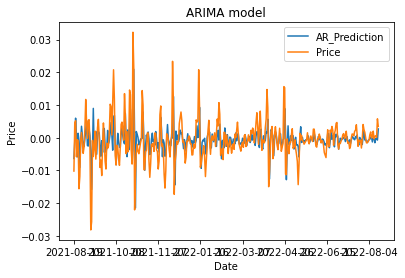

In [17]:
a_df.plot(y=['AR_Prediction', 'Price'],ylabel='Price',title='ARIMA model')

# Problem 5

In [18]:
p = 2
q = 1
d = 2
a_model = sm.tsa.arima.ARIMA(df, order=(2,2,1))
res = a_model.fit()
res.summary()

c:\users\pradeep\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\pradeep\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\pradeep\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(2, 2, 1)   Log Likelihood                1368.087
Date:                Fri, 07 Oct 2022   AIC                          -2728.174
Time:                        22:46:31   BIC                          -2712.586
Sample:                    08-15-2021   HQIC                         -2721.979
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0101      0.076      0.133      0.894      -0.139       0.159
ar.L2         -0.5602      0.021    -26.560      0.000      -0.602      -0.519
ma.L1         -0.0955      0.085     -1.120      0.263      -0.263       0.072
sigma2      3.175e-05   1.24e-06     25.589      0.000    2.93e-05    3.42e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               481.41
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Date'>

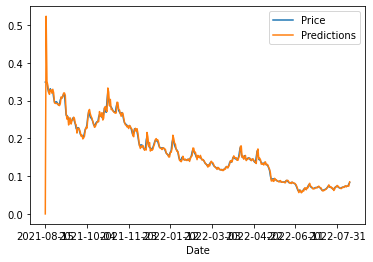

In [19]:
df['Predictions'] = res.predict(0, len(df)-1)
df.plot()

<AxesSubplot: >

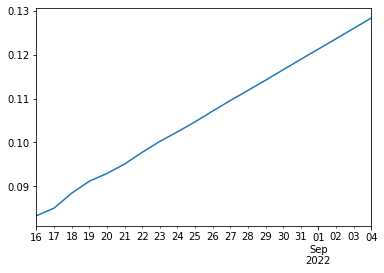

In [20]:
res.forecast(20).plot()

# Problem 6

In [21]:
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,49.43655,3.387495e-07


The test statistic of the test is 49.43655 and the p-value is 3.387495e-07 which is lesser than 0.05,so we can reject null hypothesis and it can be concluded that the residuals aren't independantly distributed